# 0. Pendahuluan

Untuk melakukan penambangan data terhadap data MariBisnis.csv yang merupakan data penjualan rumah di King County, USA. Kami menggunakan metode data mining Cross-Industry Standart Process for Data Mining (CRISP-DM). Berikut adalah ilustrasi dari CRISP-DM :

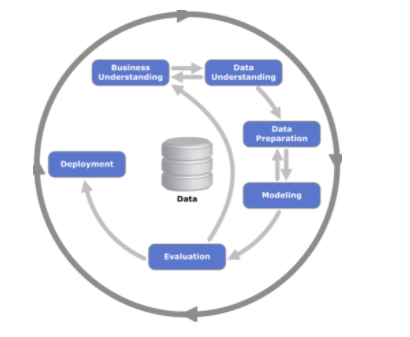

Cross-Industry Standard Process for Data Mining atau CRISP-DM adalah salah satu model proses datamining (datamining framework) yang awalnya (1996) dibangun oleh 5 perusahaan yaitu Integral Solutions Ltd (ISL), Teradata, Daimler AG, NCR Corporation dan  OHRA. Framework ini kemudian dikembangan oleh ratusan organisasi dan perusahaan di Eropa untuk dijadikan methodology standard non-proprietary bagi data mining. Versi pertama dari methodologi ini dipresentasikan pada 4th CRISP-DM SIG Workshop di Brussels pada bulan Maret 1999 (Pete Chapman, 1999); dan langkah langkah proses data mining berdasarkan model ini di publikasikan pada tahun berikutnya (Pete Chapman,2000).

Beberapa tahapan dalam CRISP-DM yaitu :
1. Busnisess Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation
6. Deployment


## Import Library

In [ ]:
#Data Preprocessing and Algebra
import numpy as np 
import pandas as pd 

#Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

#Machine Learning and Evaluation Model
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate, cross_val_predict
!pip install xgboost
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

# 1. Business Understanding

Pada tahap business understanding ini, kami menentukan tujuan dan persyaratan dengan jelas secara keseluruhan, menerjemahkan tujuan tersebut serta menentukan pembatasan dalam perumusan masalah data mining, dan selanjutnya mempersiapkan strategi awal untuk mencapai tujuan tersebut.

Dataset ini berisi harga jual rumah untuk King County,USA yang mencakup Seattle. Rumah yang dijual disini adalah rumah yang dijual antara bulan Mei 2014 hingga Mei 2015.

Tidak adanya acuan dalam harga penjualan rumah melatarbelakangi kami untuk mengembangkan model regresi ini. Diharapkan dengan adanya model ini tidak terjadi kebingungan dalam menentukan harga jual maupun harga beli dari sebuah rumah.

Tujuan dan rumusan masalah yang akan diselesaikan adalah **melakukan prediksi terhadap harga rumah, menurut feature-feature yang tersedia** seperti jumlah tempat tidur, kamar mandi, dan lain sebagainya yang merupakan atribut dari sebuah rumah dan **melakukan eksplorasi dari dataset yang tersedia untuk keperluan bisnis, seperti melihat sebaran harga rumah menurut lokasi**, melihat hubungan antara harga rumah dengan kondisi, apakah sudah pernah melakukan renovasi atau tidak, dan lain-lain.

* Prediksi harga rumah tersebut berguna untuk penjual maupun pembeli, untuk penjual berguna untuk perkiraan harga yang nantinya akan dipasang pada iklan atau harga yang ditawarkan kepada pembeli. Untuk pembeli berguna untuk melihat kisaran harga yang ditawarkan sehingga dapat menyiapkan budget yang sesuai. Dalam prediksi harga kami akan menggunakan XGboost Regressor dengan Metricsnya adalah RMSE
* Eksplorasi dataset berguna untuk perusahaan marketplace jual-beli rumah seperti dalam menentukan segmentasi pasar dan menentukan keputusan bisnis.


# 2. Data Understanding

Setalah kita mengetahui permasalahan bisnis yang akan kita selesaikan, kita selanjutnya akan mengetahui data yang akan kita gunakan untuk menyelesaikan masalah bisnis tersebut. Kita akan melakukan data describing, untuk mengenal data tersebut.

### Meload Data

In [ ]:
#Get Data
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1a8wJ6H5kdDTH4Mkwp0Zi1kI0UhUwNYtl' -O MariBisnis.csv
df = pd.read_csv("/content/MariBisnis.csv")

--2021-12-03 07:37:27--  https://docs.google.com/uc?export=download&id=1a8wJ6H5kdDTH4Mkwp0Zi1kI0UhUwNYtl
Resolving docs.google.com (docs.google.com)... 172.217.204.113, 172.217.204.101, 172.217.204.102, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u7j5jpt4t2st5uekq5tenq2cicqlg54j/1638516975000/17539190491766931577/*/1a8wJ6H5kdDTH4Mkwp0Zi1kI0UhUwNYtl?e=download [following]
--2021-12-03 07:37:27--  https://doc-0o-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u7j5jpt4t2st5uekq5tenq2cicqlg54j/1638516975000/17539190491766931577/*/1a8wJ6H5kdDTH4Mkwp0Zi1kI0UhUwNYtl?e=download
Resolving doc-0o-b4-docs.googleusercontent.com (doc-0o-b4-docs.googleusercontent.com)... 64.233.170.132, 2607:f8b0:400c:c0d::84
Connecting to doc-0o-b4-docs.googleusercontent.com (doc-0o-

### Melihat Sebagian Data

In [ ]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
468,1723049270,20150107T000000,340500.0,3,2.00,2270,28025,1.0,0,0,4,7,1920,350,1947,0,98168,47.4857,-122.318,1770,14833
19008,4077800474,20141124T000000,571500.0,4,1.75,1920,7455,1.0,0,0,4,7,960,960,1939,1964,98125,47.7106,-122.286,1920,7455
8609,8024202350,20140721T000000,435000.0,2,1.00,1650,5106,1.0,0,0,3,7,1090,560,1960,0,98115,47.6992,-122.309,1300,6947
2130,2483200060,20140612T000000,678500.0,3,2.00,2460,6600,1.0,0,2,4,8,1370,1090,1952,0,98136,47.5215,-122.383,2150,6600
18047,3322049095,20150205T000000,240000.0,3,1.00,1690,20063,1.5,0,0,4,7,1690,0,1913,0,98001,47.3556,-122.294,1700,15899
5428,710300010,20150127T000000,680000.0,4,2.75,2720,54048,2.0,0,0,3,8,2720,0,1985,0,98072,47.7181,-122.089,2580,37721
17559,3260810150,20140926T000000,355000.0,3,2.00,2160,8091,1.5,0,0,3,8,2160,0,2000,0,98003,47.3474,-122.303,2190,8297
8244,5078400090,20141209T000000,915000.0,5,2.75,2580,7630,1.0,0,0,4,7,1730,850,1954,0,98004,47.6226,-122.205,2040,7717
1623,4213910030,20150401T000000,550000.0,4,2.50,1670,5116,2.0,0,0,3,8,1670,0,1999,0,98155,47.7667,-122.330,1910,7210
3371,9551201250,20140902T000000,750000.0,3,1.00,1640,6516,1.5,0,0,4,7,1440,200,1935,0,98103,47.6693,-122.339,1770,4000


### Melihat Baris dan Kolom/Variabel/Featurenya

In [ ]:
df.shape

(21613, 21)

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Terdapat 21613 baris data dan 21 kolom, salah satunya yaitu variabel price merupakan target variabel yang nantinya akan dibuatkan model terhadap variabel tersebut. Berikut adalah penjelasan dari setiap kolomnya :

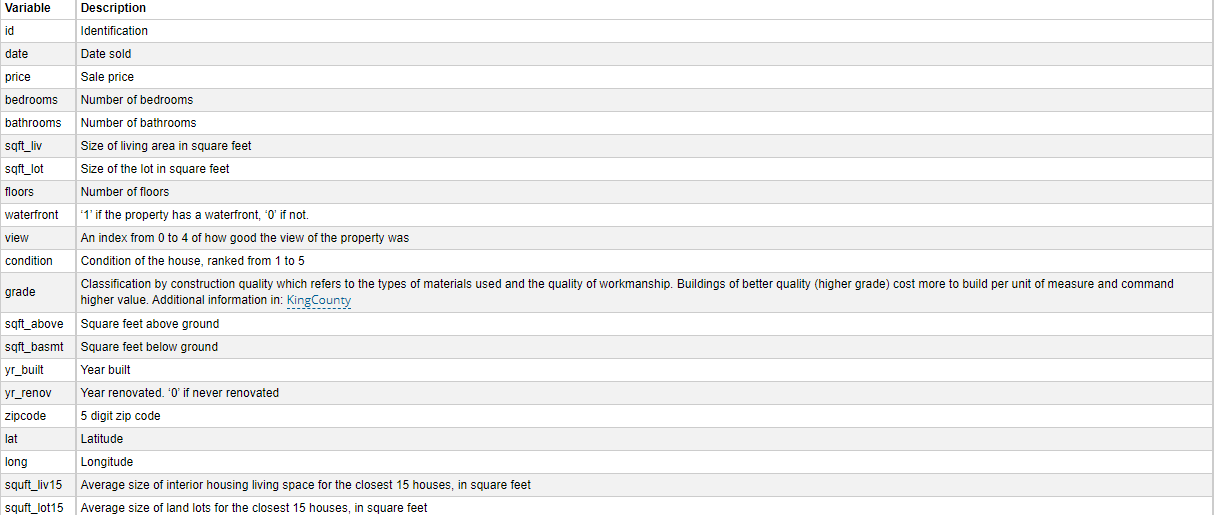

sumber : https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

### Melihat Apakah Terdapat Nilai Null Pada Data

In [ ]:
import missingno

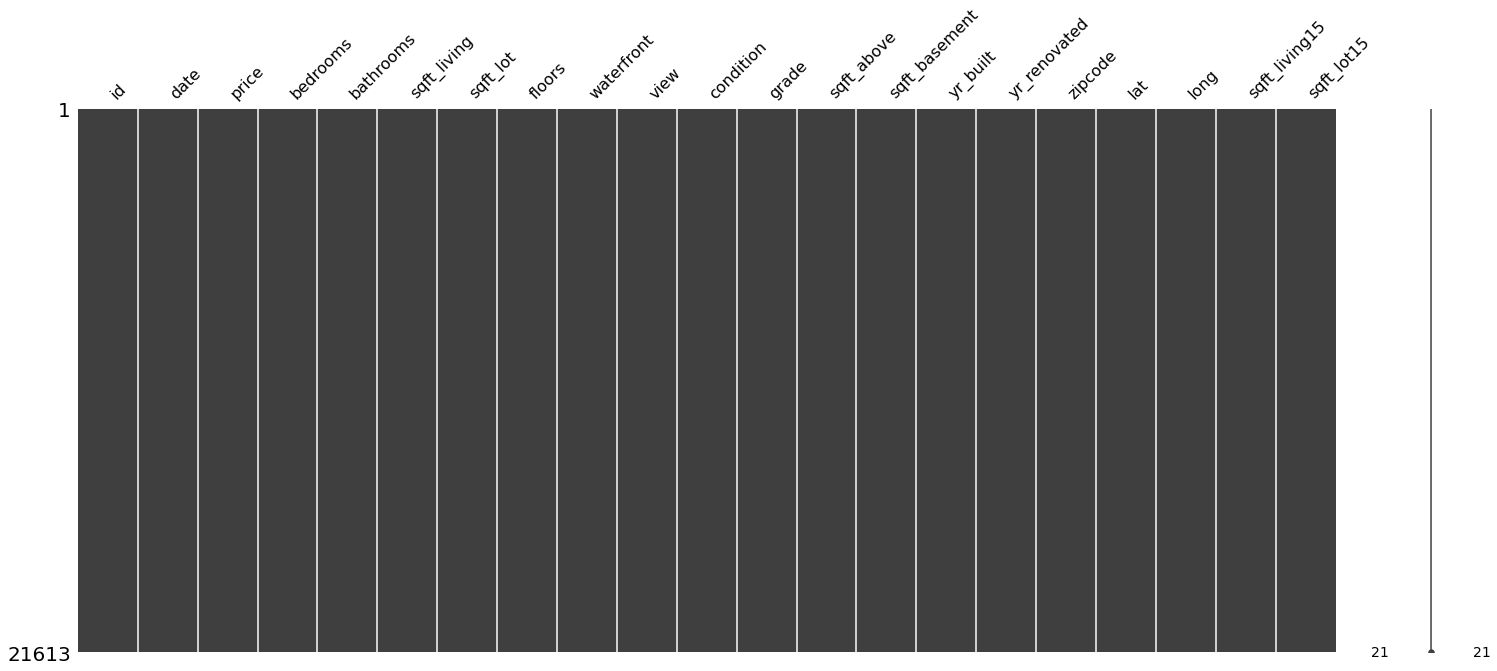

In [ ]:
missingno.matrix(df)

In [ ]:
#Melihat data yang hilang
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(df)

,Total,Percent
sqft_lot15,0,0.0
view,0,0.0
date,0,0.0
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0
floors,0,0.0
waterfront,0,0.0


Dapat dilihat bahwa tidak terdapat nilai null atau missing value pada dataset tersebut

### Menentukan Apakah Sebuah Kolom Itu Merupakan Data Kategorik atau Numerik

Berdasarkan ilmu pengetahuan dan dataset yang digunakan berikut adalah pembagian data numerik dan data kategorik dari setiap kolom, hal ini berguna dalam melakukan Exploratory Data Analysis :

1. Data Kategorik
* id (Nominal)
* Date (Nominal)
* waterfront (Nominal)
* view (Nominal)
* condition (Ordinal)
* grade (Ordinal)
* zipcode (Nomnial)

2. Data Numerik
* price
* bedrooms
* bathrooms
* sqft_living
* sqft_lot
* floor
* sqft_above
* sqft_basement
* yr_built
* yr_renovated
* lat
* long
* sqft_living15
* sqft_lot15


### Menghitung Nilai Unik Pada Setiap Kolom dan Melakukan Analisis Deskriptif Sederhana

In [ ]:
#Mengitung nilai yang unik
for col in df.columns:
    print('Nilai unik pada feature', col, 'adalah')
    print(df[col].value_counts())
    print('\n')

Nilai unik pada feature id adalah
795000620     3
2206700215    2
643300040     2
3333002450    2
1995200200    2
             ..
3420069065    1
7812801125    1
4364700875    1
3021059276    1
1777500160    1
Name: id, Length: 21436, dtype: int64


Nilai unik pada feature date adalah
20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20140727T000000      1
20150215T000000      1
20150515T000000      1
20140803T000000      1
20150131T000000      1
Name: date, Length: 372, dtype: int64


Nilai unik pada feature price adalah
450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
641500.0      1
575950.0      1
674250.0      1
608700.0      1
884744.0      1
Name: price, Length: 4028, dtype: int64


Nilai unik pada feature bedrooms adalah
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11   

In [ ]:
column = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

numeric = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','lat', 
           'long', 'sqft_living15', 'sqft_lot15']

df[numeric].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


Berikut adalah hal yang kita dapatkan pada langkah ini :

* Kita dapat melihat pada variabel id terdapat id yang terulang, hal ini menunjukan **terdapat beberapa rumah yang dibeli kemudian dijual kembali lebih dari satu kali dalam rentang waktu May 2014 sampai May 2015**. Namun, karena lebih banyak variabel id yang tidak terulang kita akan menghapus variabel id ini dalam proses analisis.
* Berdasarkan ciri-ciri dataset, data kita bukanlah time-series walaupun terdapat variabel date. Mengepa demikian? karena pada data time-series yang diamati hanyalah satu entitas, sementara data yang kita gunakan lebih dari 1 entitas. Kita dapat menghapus kolom date pada proses modelling, namun kolom ini berguna untuk melihat rata-rata penjualan setiap harinya atau setiap bulannya.
* Berdasarkan variabel floor, rumah yang dijual kebanyakan berlantai 1 dan 2
* Hanya sedikit rumah yang terletak pada pinggir pantai (163 rumah saja)
* Kebanyakan rumah memiliki nilai view 0
* Kondisi rumah terbanyak adalah dengan nilai 3
* Kebanyakan rumah yang dijual tidak memiliki basement
* 559 Rumah dibagun pada tahun 2014, kami menganggap rumah tersebut adalah rumah baru
* Kebanyakan rumah tidak direnovasi
* Harga rata-rata rumah adalah 540088.1 dolar
* Berdasarkan standar deviasi lat dan long kita dapat melihat bahwa rumah yang dijual masih dalam satu region yaitu di King County, USA

# 3. Data Preparation

Pada tahap ini kita akan melakukan transformasi data dan pembersihan data, setalh itu kita akan sedikit melakukan Exploratory Data Analysis (EDA) untuk mendapatkan insight dari data yang sudah kita buat, sehingga dapat dijadikan alasan dalam pengambilan keputusan bisnis.

## 3.1 Data Transformation

Pada tahap ini kita akan :
* Membulatkan bilangan pada variabel bathroom
* Menambahkan kolom is_renovated
* Menambahkan kolom have_basement
* Menambahkan kolom yr_sold, month, sold, building_age

In [ ]:
#Membulatkan bilangan pada variabel floors dan bathrooms
df["bathrooms"] = np.round(df.bathrooms)
df["floors"] = np.round(df.floors)

In [ ]:
#Menambahkan kolom is_renovated
is_renovated = []
for x in df["yr_renovated"] :
    if x == 0:
        x=0
    else :
        x=1
    is_renovated.append(x)
df["is_renovated"] = np.array(is_renovated)

In [ ]:
#Menambahkan kolom have_basement
have_basement = []
for x in df["sqft_basement"] :
    if x == 0:
        x=0
    else :
        x=1
    have_basement.append(x)
df["have_basement"] = np.array(have_basement)

In [ ]:
#Menambahkan kolom building_age, yr_sold, month_sold
from datetime import datetime
import calendar

df['date'] = df['date'].str.split('T').str[0]

months = []
years = []
for x in df.date :
    datetime_object = datetime.strptime(x, '%Y%m%d')
    month = datetime_object.month
    month = calendar.month_name[month]
    year = datetime_object.year
    months.append(month)
    years.append(year)

df["yr_sold"] = np.array(years)
df["month_sold"] = np.array(months)
df["building_age"] = df["yr_sold"] - df["yr_built"]

## 3.2 Exploratory Data Analysis

Pada tahap ini kita akan melakukan EDA untuk mendapatkan insight bagi keperluan bisnis. Insight yang diambil selalu dikaitkan dengan target variabel yaitu price. Beberapa visualisasi yang dilakukan :
* Sebaran Harga Rumah
* Bulan dengan Penjualan Terbanyak
* Banyaknya Penjualan Setiap Tahun
* Harga Terhadap Kepunyaan Basement atau Tidak
* Harga Terhadap Apakah Rumah Sudah Direnovasi atau Belum
* Harga Terhadap Letak Rumah yang Berada Dipinggir Air atau Tidak
* Harga Rumah terhadap View
* Harga Rumah terhadap Condition
* Harga Rumah terhadap Grade
* Harga Rumah terhadap Jumlah Lantai
* Harga Rumah terhadap Banyaknya Kamar Tidur
* Harga Rumah terhadap Banyaknya Bathroom
* Harga Rumah terhadap sqft_lot
* Harga Rumah terhadap sqft_lot15
* Harga Rumah terhadap sqft_living
* Harga Rumah terhadap sqft_living15
* Harga Rumah terhadap building_age
* Harga Rumah terhadap sqft_basement
* Harga Rumah terhadap sqft_above
* Komponen Numerik yang Penting Dalam Penentuan Harga Rumah
* Komponen Kategorik yang Penting Dalam Penentuan Harga Rumah
* Melihat sebaran harga rumah terdahap lokasi rumah

Text(0.5, 1.0, 'Sebaran Harga Rumah')

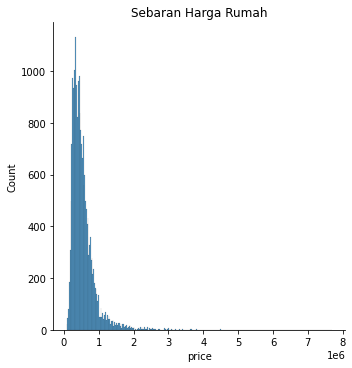

In [ ]:
# Sebaran Harga Rumah
sns.displot(df.price)
plt.title("Sebaran Harga Rumah")

In [ ]:
df["price"].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

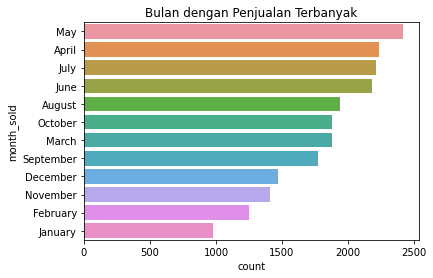

In [ ]:
#Bulan dengan Penjualan Terbanyak
sns.countplot(y ='month_sold', data = df,order = df["month_sold"].value_counts().index)

plt.title("Bulan dengan Penjualan Terbanyak")
# Show the plot
plt.show()

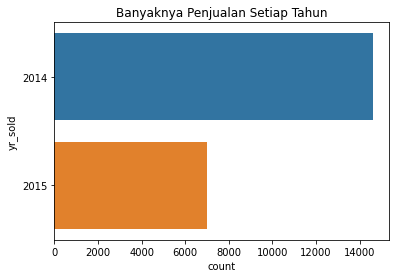

In [ ]:
#Banyaknya Penjualan Setiap Tahun
sns.countplot(y ='yr_sold', data = df,order = df["yr_sold"].value_counts().index)

plt.title("Banyaknya Penjualan Setiap Tahun")
# Show the plot
plt.show()

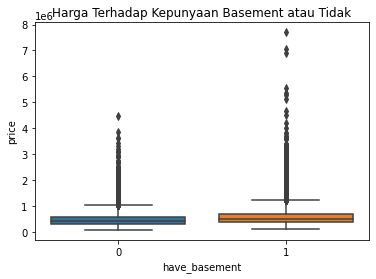

In [ ]:
#Harga Terhadap Kepunyaan Basement atau Tidak
sns.boxplot(y=df["price"],x = df['have_basement'])
plt.title("Harga Terhadap Kepunyaan Basement atau Tidak")
# Show the plot
plt.show()

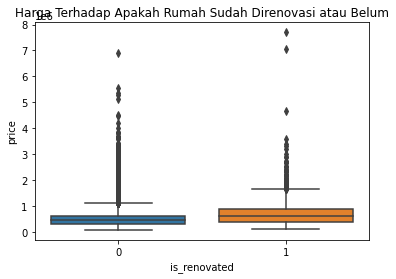

In [ ]:
#Harga Terhadap Apakah Rumah Sudah Direnovasi atau Belum

sns.boxplot(y=df["price"],x = df['is_renovated'])
plt.title("Harga Terhadap Apakah Rumah Sudah Direnovasi atau Belum")
# Show the plot
plt.show()

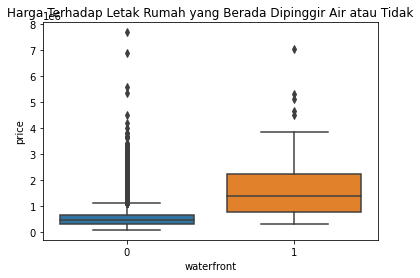

In [ ]:
#Harga Terhadap Letak Rumah yang Berada Dipinggir Air atau Tidak
sns.boxplot(y=df["price"],x = df['waterfront'])

plt.title("Harga Terhadap Letak Rumah yang Berada Dipinggir Air atau Tidak")
# Show the plot
plt.show()

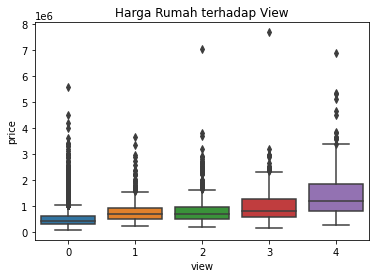

In [ ]:
#Harga Rumah terhadap View
sns.boxplot(y=df["price"],x = df['view'])

plt.title("Harga Rumah terhadap View")
# Show the plot
plt.show()

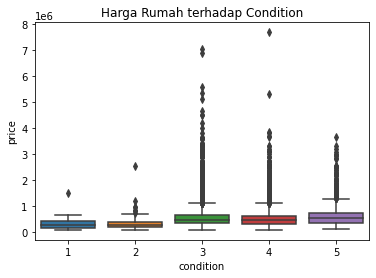

In [ ]:
#Harga Rumah terhadap Condition
sns.boxplot(y=df["price"],x = df['condition'])

plt.title("Harga Rumah terhadap Condition")
# Show the plot
plt.show()

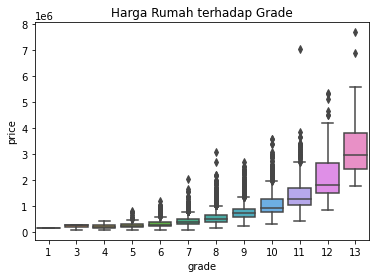

In [ ]:
#Harga Rumah terhadap Grade
sns.boxplot(y=df["price"],x = df['grade'])

plt.title("Harga Rumah terhadap Grade")
# Show the plot
plt.show()

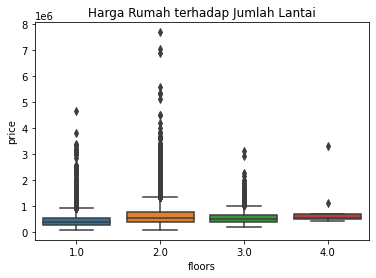

In [ ]:
#Harga Rumah terhadap Jumlah Lantai

sns.boxplot(y=df["price"],x = df['floors'])

plt.title("Harga Rumah terhadap Jumlah Lantai")
# Show the plot
plt.show()

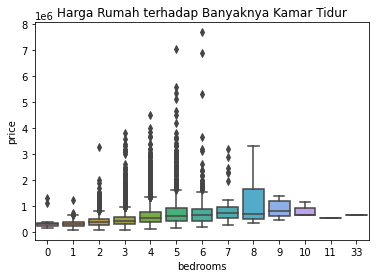

In [ ]:
#Harga Rumah terhadap Banyaknya Kamar Tidur
sns.boxplot(y=df["price"],x = df['bedrooms'])

plt.title("Harga Rumah terhadap Banyaknya Kamar Tidur")
# Show the plot
plt.show()

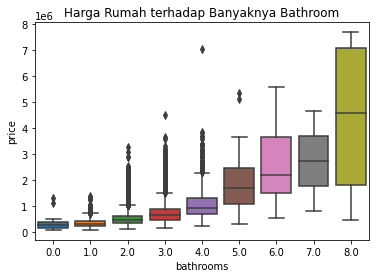

In [ ]:
#Harga Rumah terhadap Banyaknya Bathroom
sns.boxplot(y=df["price"],x = df['bathrooms'])

plt.title("Harga Rumah terhadap Banyaknya Bathroom")
# Show the plot
plt.show()

Text(0.5, 1.0, 'Harga Rumah terhadap sqft_lot')

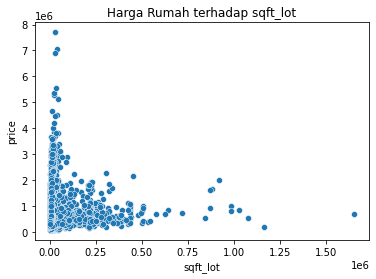

In [ ]:
#Harga Rumah terhadap sqft_lot
sns.scatterplot(y=df["price"],x = df['sqft_lot'])
plt.title("Harga Rumah terhadap sqft_lot")

Text(0.5, 1.0, 'Harga Rumah terhadap sqft_lot15')

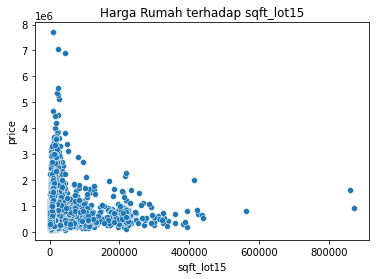

In [ ]:
#Harga Rumah terhadap sqft_lot15
sns.scatterplot(y=df["price"],x = df['sqft_lot15'])
plt.title("Harga Rumah terhadap sqft_lot15")

Text(0.5, 1.0, 'Harga Rumah terhadap sqft_living')

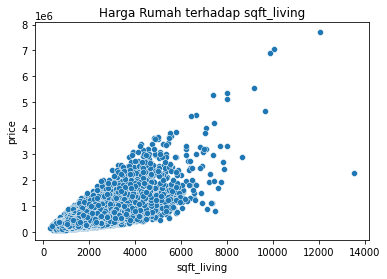

In [ ]:
#Harga Rumah terhadap sqft_living
sns.scatterplot(y=df["price"],x = df['sqft_living'])
plt.title("Harga Rumah terhadap sqft_living")

Text(0.5, 1.0, 'Harga Rumah terhadap sqft_living15')

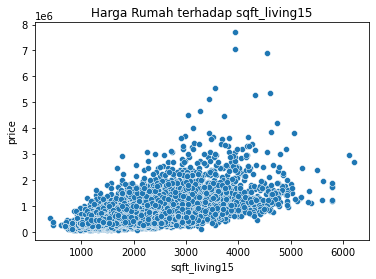

In [ ]:
#Harga Rumah terhadap sqft_living15
sns.scatterplot(y=df["price"],x = df['sqft_living15'])
plt.title("Harga Rumah terhadap sqft_living15")

Text(0.5, 1.0, 'Harga Rumah terhadap building_age')

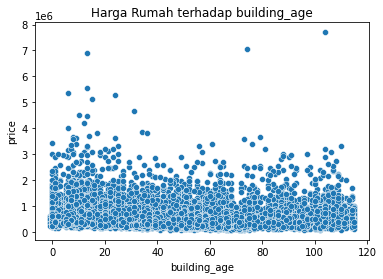

In [ ]:
#Harga Rumah terhadap building_age
sns.scatterplot(y=df["price"],x = df['building_age'])
plt.title("Harga Rumah terhadap building_age")

Text(0.5, 1.0, 'Harga Rumah terhadap sqft_basement')

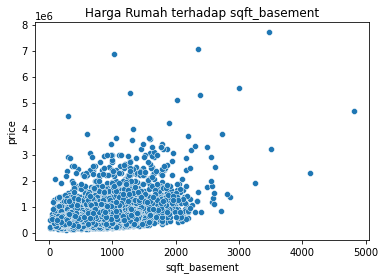

In [ ]:
#Harga Rumah terhadap sqft_basement
sns.scatterplot(y=df[df['sqft_basement']!=0]["price"],x = df[df['sqft_basement']!=0]["sqft_basement"])
plt.title("Harga Rumah terhadap sqft_basement")

Text(0.5, 1.0, 'Harga Rumah terhadap sqft_above')

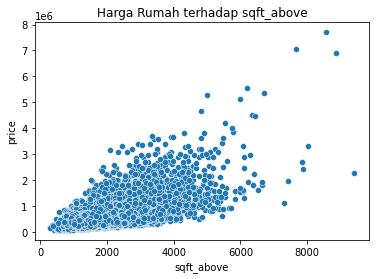

In [ ]:
#Harga Rumah terhadap sqft_basement
sns.scatterplot(y=df["price"],x = df['sqft_above'])
plt.title("Harga Rumah terhadap sqft_above")

In [ ]:
#Memisahkan Kolom Numerik dan Kategorik
numeric = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','lat', 'long', 'sqft_living15', 'sqft_lot15','building_age','yr_sold']

categoric = ["grade","view","condition","zipcode","waterfront"]

categoric = ["grade","view","have_basement","is_renovated","condition","zipcode","waterfront","price"]

df_numeric = df[numeric]
df_categoric = df[categoric]

In [ ]:
#Melihat Korelasi harga terhadap variabel numerik
Corr = pd.DataFrame((abs(df_numeric.corr()['price']).sort_values(ascending = False)))
Corr = Corr.reset_index()
Corr = Corr.drop(Corr[Corr.price == 1].index)
#Mengubah Nama Kolom
Corr = Corr.rename({'price': 'Correlation_Score'}, axis=1)
Corr

,index,Correlation_Score
1,sqft_living,0.702035
2,sqft_above,0.605567
3,sqft_living15,0.585379
4,bathrooms,0.518912
5,sqft_basement,0.323816
6,bedrooms,0.308350
7,lat,0.307003
8,floors,0.244906
9,yr_renovated,0.126434
10,sqft_lot,0.089661


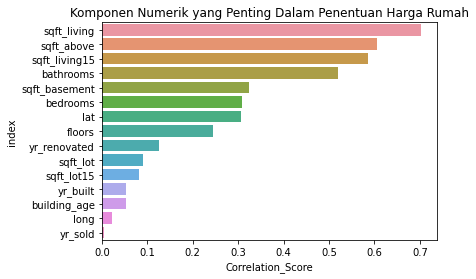

In [ ]:
sns.barplot(x=Corr["Correlation_Score"],y = Corr['index'])
plt.title("Komponen Numerik yang Penting Dalam Penentuan Harga Rumah")
# Show the plot
plt.show()

In [ ]:
#Melihat Korelasi harga terhadap variabel kategorik
Corr = pd.DataFrame((abs(df_categoric.corr(method='kendall')['price']).sort_values(ascending = False)))
Corr = Corr.reset_index()
Corr = Corr.drop(Corr[Corr.price == 1].index)
#Mengubah Nama Kolom
Corr = Corr.rename({'price': 'Correlation_Score'}, axis=1)
Corr

,index,Correlation_Score
1,grade,0.527834
2,view,0.237573
3,have_basement,0.167626
4,waterfront,0.094069
5,is_renovated,0.082575
6,condition,0.014481
7,zipcode,0.009827


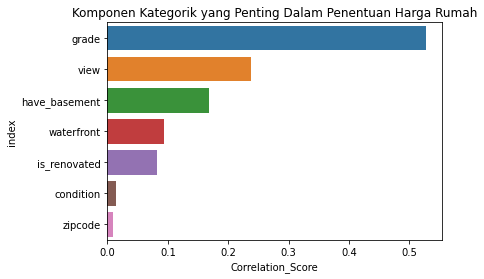

In [ ]:
sns.barplot(x=Corr["Correlation_Score"],y = Corr['index'])
plt.title("Komponen Kategorik yang Penting Dalam Penentuan Harga Rumah")
# Show the plot
plt.show()

In [ ]:
# #Melihat sebaran harga rumah terdahap lokasi rumah
# df["price_per_sqft_living"] = df["price"]/df["sqft_living"]

# fig = px.scatter_mapbox(df, lat="lat", lon="long",     color="price_per_sqft_living", size="sqft_living",
#                   color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10, title="Geomap Plot Dari Harga Rumah per Sqft_living di Kota King County")

# fig.update_layout(mapbox_style="open-street-map")

# fig.show()

In [ ]:
#Save File Bersih
df.to_csv("MariBisnisClean.csv",index=False)

## Power BI Visualization (Dashboard)

Visit : https://app.powerbi.com/view?r=eyJrIjoiOWIxNTA5MTItNTg1NC00ZDQyLWEzYTctOWRiMTRhZGU3YmQ2IiwidCI6ImFmMmMwNzM0LWNiNDItNDY0Zi1iNmJmLTJhMjQxYjZhZGE1NiIsImMiOjEwfQ%3D%3D&pageName=ReportSection

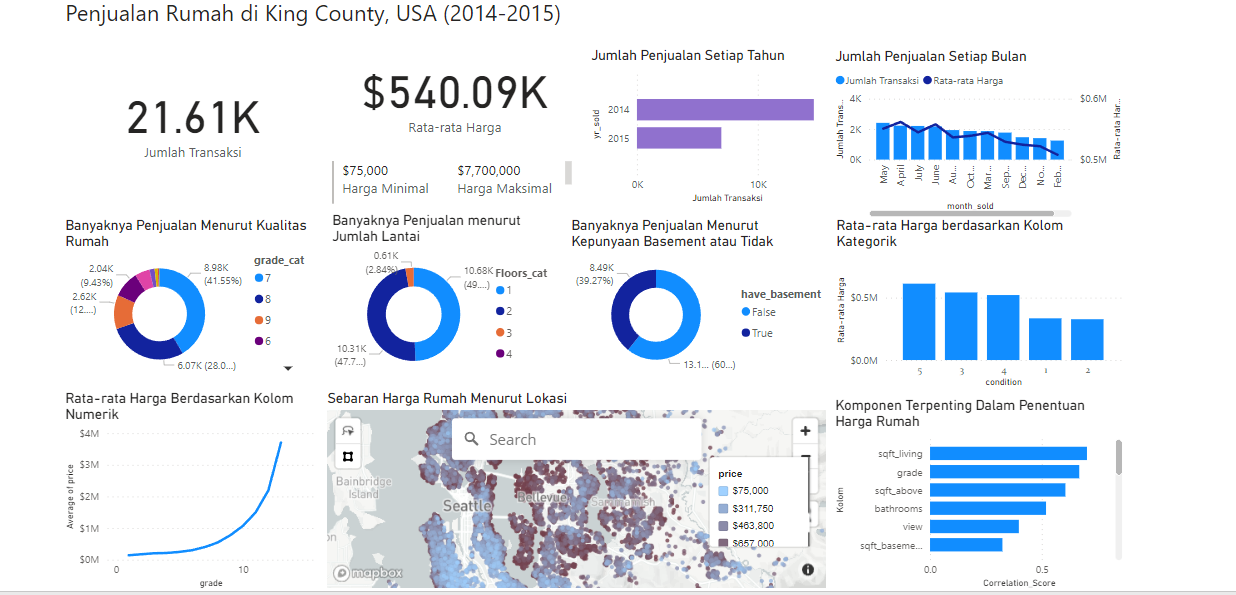

# 4. Modelling

Pada tahap modelling, pertama kita memisahkan X dan y dimana variabel y adalah variabel target kita yaitu "price". Setelah itu kita melakukan hyperparameter tuning untuk mencari parameter mana yang terbaik yang akan digunakan pada model XGboost yang kita buat. Selanjutnya kita memisahkan data menjadi data latih dan data test. Kemudian melakukan testing dan melakukan plotting terhadap hasil aktual vs hasil prediksi. Berdasarkan hasil EDA, kita hanya memilih beberapa variabel yang akan dimasukan ke variabel X, yaitu :
* "sqft_living15"
* "sqft_living"
* "sqft_above"
* "sqft_basement"
* "bathrooms"
* "bedrooms"
* "floors"
* "grade"
* "view"
* "have_basement"
* "waterfront"
* "is_renovated"
* "lat"
* "long"


In [ ]:
#Memisahkan X dan y
selected = ["sqft_living15","sqft_living","sqft_above","sqft_basement","bathrooms","bedrooms","floors","grade","view","have_basement","waterfront","is_renovated","price","lat","long"]
df_selected = df[selected]

X = df_selected.drop(columns="price")
y = df_selected["price"]

In [ ]:
#Parameter Tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'tree_method': ['gpu_hist'],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [ ]:
# hyperParameterTuning(X, y)

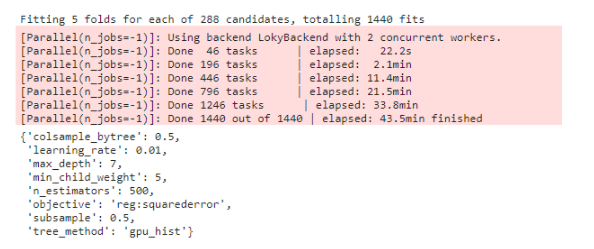*italicized text*![image.png](attachment:8f98b8ea-499d-4ace-8165-1efd2d89bb9f.png)![image.png]()

In [ ]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
#Melatih Model
xgb_model = XGBRegressor(colsample_bytree = 0.5,
 learning_rate = 0.01,
 max_depth = 7,
 min_child_weight = 5,
 n_estimators = 500,
 objective = 'reg:squarederror',
 subsample= 0.5)
model = xgb_model.fit(X_train, y_train)

In [ ]:
# Memprediksi nilai y dari X_test
y_predict = model.predict(X_test)

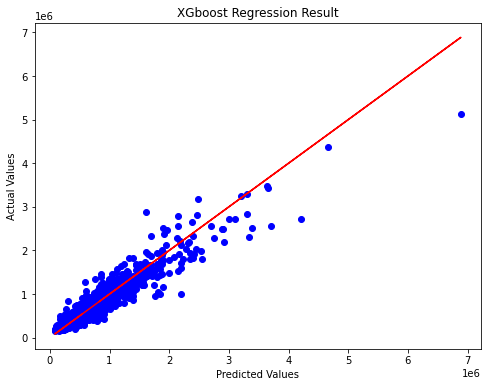

In [ ]:
# Aktual vs Prediksi 

fig, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(y_test,y_predict,color='blue')
plt.plot(y_test,y_test,color='red')
plt.title('XGboost Regression Result')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# 5. Evaluation

Pada tahap ini kita akan melakukan evaluasi terhadap model yang kita buat, menggunakan cross-validation, dengan jumlah fold = 5. Metrics yang digunakan dalam evaluasi ini ada 3 yaitu mean_absolute_error, root_mean_squared_error, dan yang terakhir adalah r2_score.

In [ ]:
#Cross-Validation
scoring = {'MSE' : make_scorer(mean_squared_error),
          'MAE' : make_scorer(mean_absolute_error),
           'R2' : make_scorer(r2_score)
          }
kfold = KFold(n_splits=5, random_state=1234, shuffle = True)
results_reg = cross_validate(estimator=xgb_model,X=X,
                                          y=y,
                                          cv=kfold,
                                          scoring=scoring)
results_reg

{'fit_time': array([9.92560101, 9.79808545, 9.8301537 , 9.7804091 , 9.7642386 ]),
 'score_time': array([0.18924594, 0.15572309, 0.15555167, 0.15436363, 0.15288782]),
 'test_MAE': array([73424.35709071, 75069.251406  , 77328.6729051 , 72406.5917544 ,
        71553.19281438]),
 'test_MSE': array([1.78429661e+10, 1.67571072e+10, 1.87401483e+10, 1.47178819e+10,
        1.50197839e+10]),
 'test_R2': array([0.86432893, 0.87573551, 0.8673351 , 0.88896912, 0.88762266])}

In [ ]:
rmse = np.sqrt(results_reg.get('test_MSE'))
mae = (results_reg.get('test_MAE'))
r2 = (results_reg.get('test_R2'))
print('mean_RMSE : ', "%.15f" % (rmse.mean()))
print('mean_MAE : ', "%.15f" % (mae.mean()))
print('mean_R2 : ', "%.15f" % (r2.mean()))

mean_RMSE :  128758.795739349719952
mean_MAE :  73956.413194116059458
mean_R2 :  0.876798264657017


# 6. Deployment (Azure ML Studio)

Setelah berhasil membuat model, sekarang kita akan mendeploy model yang telah berhasil kita buat. Pertama kita akan menyimpan model yang kita buat, melakukan registrasi dari model tersebut ke dalam workspace. Kemudian melakukan deployment. Setelah itu kita mencoba melakukan test terhadap model hasil deploy-an kita.

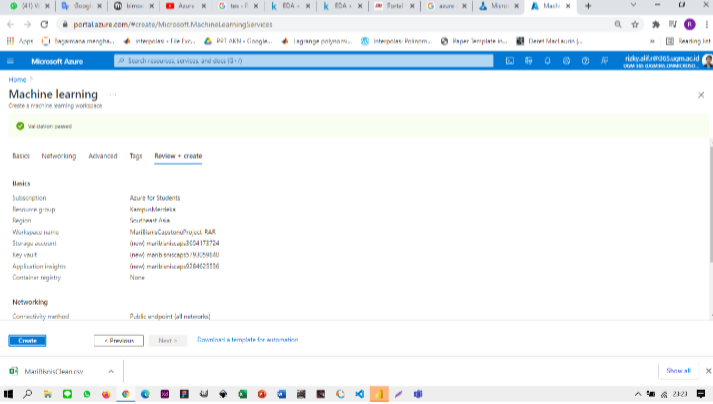

In [ ]:
# #Menyimpan Model
# from sklearn.externals import joblib
# joblib.dump(value=model, filename="model.pkl")

In [ ]:
# # Register model
# import urllib.request
# from azureml.core.model import Model

# from azureml.core import Workspace
# ws = Workspace(subscription_id="760f001d-51de-4ea3-a6ab-57123ed2aba3",
#                resource_group="KampusMerdeka",
#                workspace_name="MariBisnisCapstoneProject-RAR")


# model = Model.register(ws, model_name="kcxgb", model_path="model.pkl")

### Deploy Model

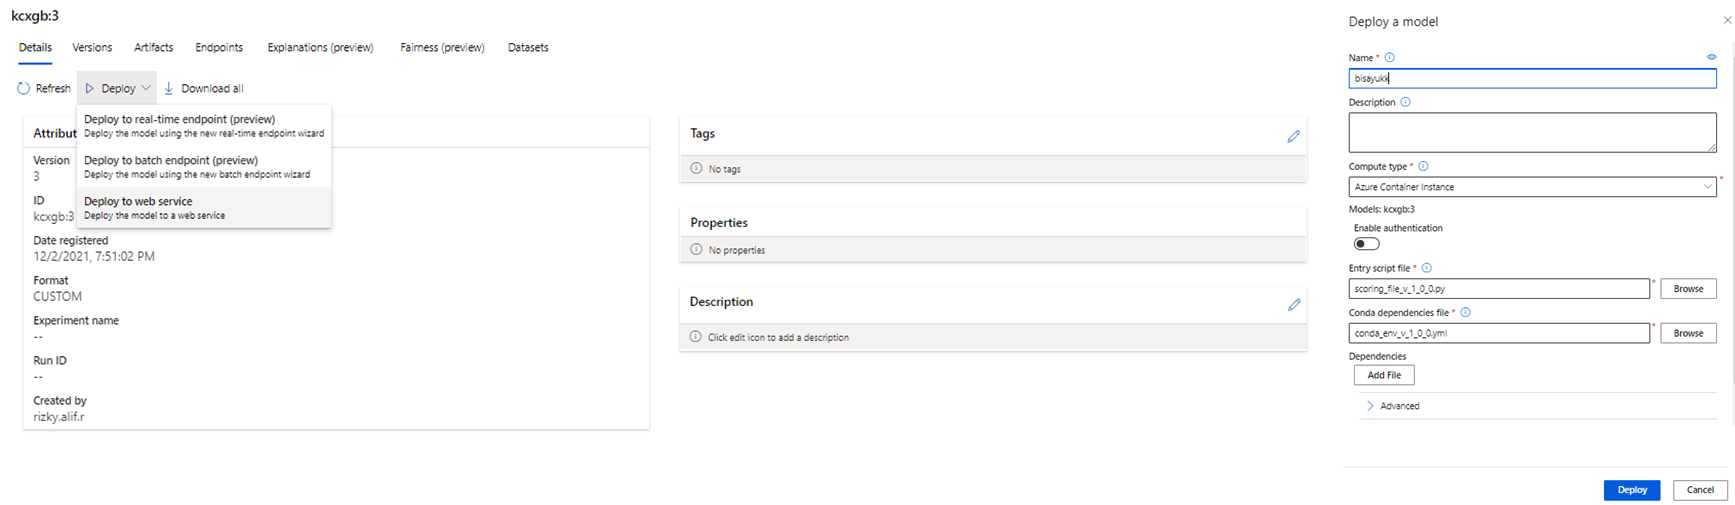

Pada tahap ini terdapat 2 file yang dibutuhkan, yaitu file environtment dan file scoring, keduanya mengatur outputan saat model sudah dideploy

In [ ]:
# #scoring_file.py
# ---------------------------------------------------------
# Copyright (c) Microsoft Corporation. All rights reserved.
# ---------------------------------------------------------

import json
import logging
import os
import pickle
import numpy as np
import pandas as pd
import joblib


from inference_schema.schema_decorators import input_schema, output_schema
from inference_schema.parameter_types.numpy_parameter_type import NumpyParameterType
from inference_schema.parameter_types.pandas_parameter_type import PandasParameterType

link = 'https://drive.google.com/uc?id=1geexbYEAPkzPE8M51pnQ-1o2V5rWA_-8'
df = pd.read_csv(link)



input_sample = pd.DataFrame({
"sqft_living15" : pd.Series([0], dtype="int64"),
"sqft_living" : pd.Series([0], dtype="int64"),
"sqft_above" : pd.Series([0], dtype="int64"),
"sqft_basement" : pd.Series([0], dtype="int64"),
"bathrooms" : pd.Series([0], dtype="int64"),
"bedrooms" : pd.Series([0], dtype="int64"),
"floors" : pd.Series([0], dtype="int64"),
"grade" : pd.Series([0], dtype="int64"),
"view" : pd.Series([0], dtype="int64"),
"have_basement" : pd.Series([0], dtype="int64"),
"waterfront": pd.Series([0], dtype="int64"),
"is_renovated" : pd.Series([0], dtype="int64"),
"lat" : pd.Series([0.0], dtype="float64"),
"long" : pd.Series([0.0], dtype="float64")
})
output_sample = np.array([0.0])

def init():
    global model
    # This name is model.id of model that we want to deploy deserialize the model file back
    # into a sklearn model
    model_path = os.path.join(os.getenv('AZUREML_MODEL_DIR'), 'model.pkl')
    model = joblib.load(model_path)


@input_schema('data', PandasParameterType(input_sample))
@output_schema(NumpyParameterType(output_sample))
def run(data):
    try:
        result = model.predict(data)
        return json.dumps({"result": result.tolist()})
    except Exception as e:
        result = str(e)
        return json.dumps({"error": result})


In [ ]:
#Conda-env.yml
# Conda environment specification. The dependencies defined in this file will
# be automatically provisioned for runs with userManagedDependencies=False.

# Details about the Conda environment file format:
# https://conda.io/docs/user-guide/tasks/manage-environments.html#create-env-file-manually

name: project_environment
dependencies:
  # The python interpreter version.
  # Currently Azure ML only supports 3.5.2 and later.
- python=3.6.2

- pip:
  - azureml-train-automl-runtime==1.35.1
  - inference-schema
  - azureml-interpret==1.35.0
  - azureml-defaults==1.35.0
- numpy>=1.16.0,<1.19.0
- pandas==0.25.1
- scikit-learn==0.22.1
- py-xgboost<=0.90
- fbprophet==0.5
- holidays==0.9.11
- psutil>=5.2.2,<6.0.0
channels:
- anaconda
- conda-forge


**Test hasil Deployment**
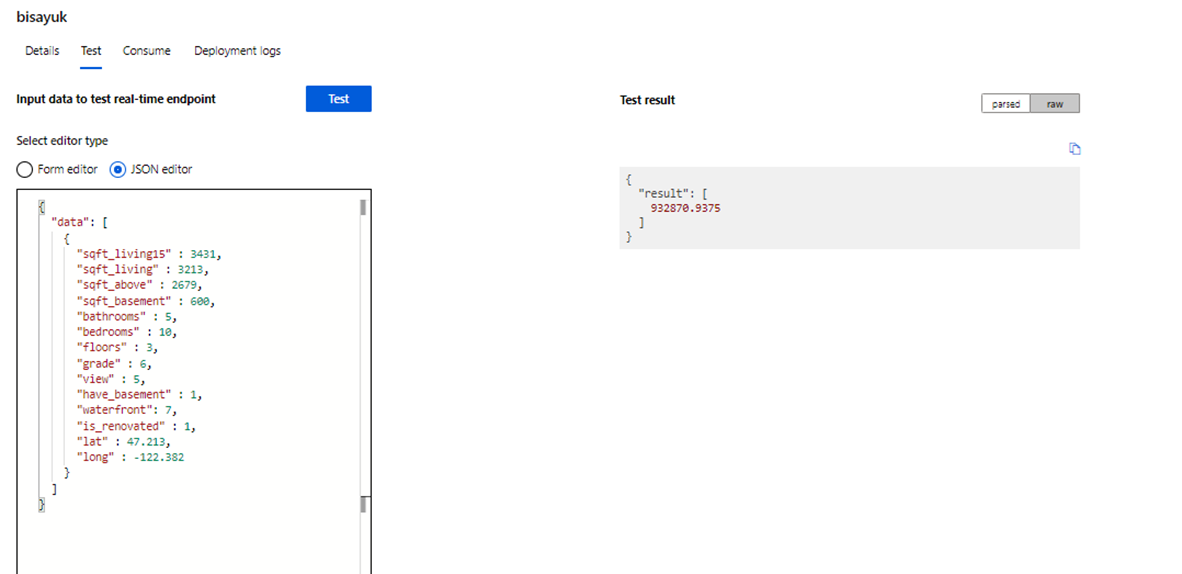